Data Description:
The dataset contains data on 5000 customers. The data include customer demographic
information (age, income, etc.), the customer's relationship with the bank (mortgage, securities
account, etc.), and the customer response to the last personal loan campaign (Personal Loan).
Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to
them in the earlier campaign.


Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting
its liability customers to personal loan customers (while retaining them as depositors). A
campaign that the bank ran last year for liability customers showed a healthy conversion rate of
over 9% success. This has encouraged the retail marketing department to devise campaigns
with better target marketing to increase the success ratio with a minimal budget

Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans

Attribute Information:
 ID: Customer ID
 Age: Customer's age in completed years
 Experience: #years of professional experience
 Income: Annual income of the customer ($000)
 ZIP Code: Home Address ZIP code.
 Family: Family size of the customer
 CCAvg: Avg. spending on credit cards per month ($000)
 Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
 Mortgage: Value of house mortgage if any. ($000)
 Personal Loan: Did this customer accept the personal loan offered in the last campaign?
 Securities Account: Doesthe customer have a securities account with the bank?
 CD Account: Doesthe customer have a certificate of deposit (CD) account with the bank?
 Online: Does the customer use internet banking facilities?
 Credit card: Doesthe customer use a credit card issued by the bank?

Import the datasets and libraries, check datatype, statistical summary,shape,null values or incorrect imputation.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [51]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
cr_df = df.drop('ID', axis =1 ) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
cr_df.shape

(5000, 13)

In [6]:
cr_df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
cr_df.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
cr_df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
#cr_df[cr_df.Experience<0]['Experience'] #Noticed some negative values in Experience so replacing median

exp_med = df.loc[:,"Experience"].median()
cr_df.loc[:, 'Experience'].replace([-1, -2, -3], [exp_med, exp_med, exp_med], inplace=True)


In [10]:
cr_df.nunique()
# Number of unique in each column

Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [11]:
len(cr_df[(cr_df['Mortgage']==0)]) #Number of people with zero mortgage?

3462

In [12]:
cr_df[(cr_df['CCAvg']==0)] #Number of people with zero credit card spending per month

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
63,42,17.0,32,94523,4,0.0,2,0,0,0,0,1,0
128,38,14.0,74,92182,2,0.0,1,0,0,1,0,1,0
198,27,3.0,59,94123,4,0.0,1,90,0,1,0,1,0
210,51,26.0,20,92131,2,0.0,1,0,0,0,0,0,0
215,38,14.0,92,95818,2,0.0,1,249,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4801,34,10.0,88,94404,2,0.0,1,121,0,0,0,1,0
4826,56,31.0,81,93943,2,0.0,3,225,0,0,0,0,0
4837,36,10.0,183,95348,2,0.0,1,0,0,0,0,0,0
4910,48,22.0,120,90291,1,0.0,1,0,0,0,0,1,0


In [13]:
cr_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.327600,11.253035,0.0,11.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


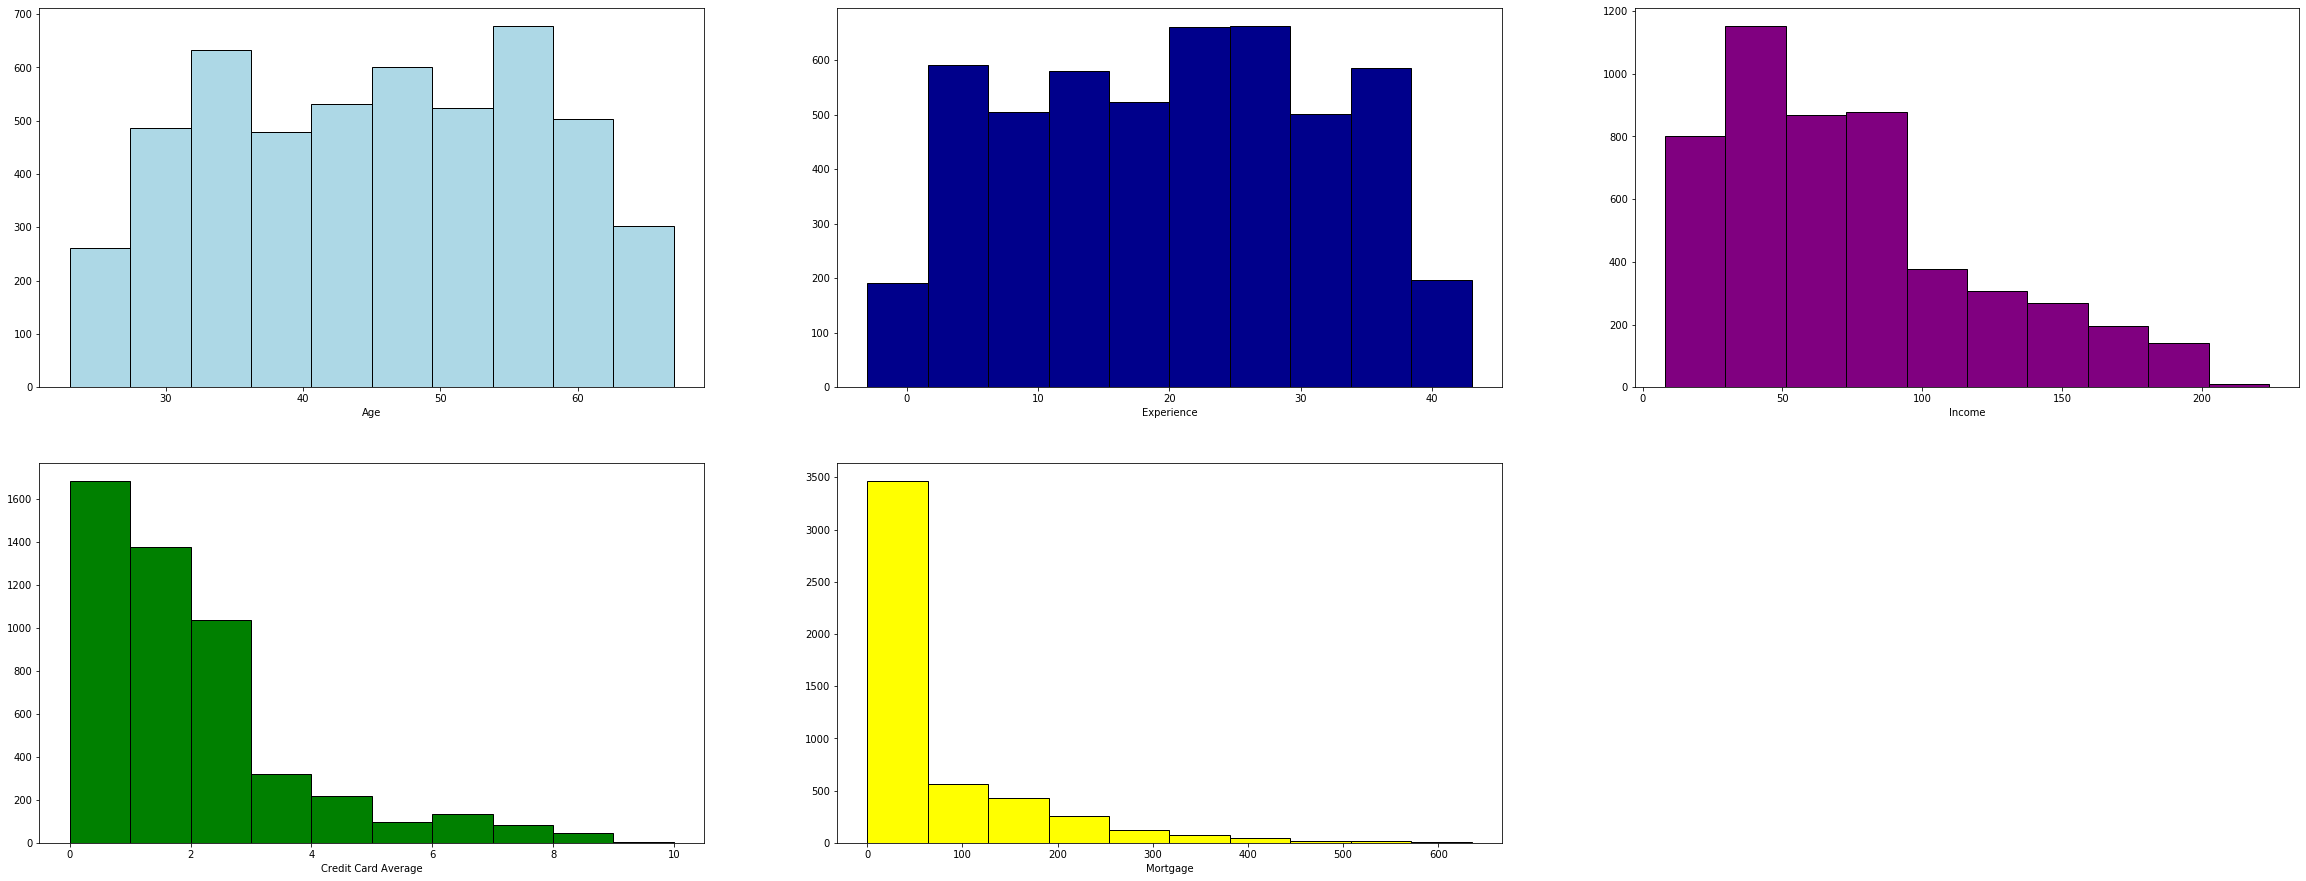

In [14]:
plt.figure(figsize= (40.5,40.5))
plt.subplot(5,3,1)
plt.hist(df.Age, color='lightblue', edgecolor = 'black')
plt.xlabel('Age')

plt.subplot(5,3,2)
plt.hist(df.Experience, color='darkblue', edgecolor = 'black')
plt.xlabel('Experience')

plt.subplot(5,3,3)
plt.hist(df.Income, color='purple', edgecolor = 'black')
plt.xlabel('Income')

plt.subplot(5,3,4)
plt.hist(df.CCAvg, color='green', edgecolor = 'black')
plt.xlabel('Credit Card Average')

plt.subplot(5,3,5)
plt.hist(df.Mortgage, color='yellow', edgecolor = 'black')
plt.xlabel('Mortgage')

plt.show()

Income, CC Average & Mortgage are highly skewed

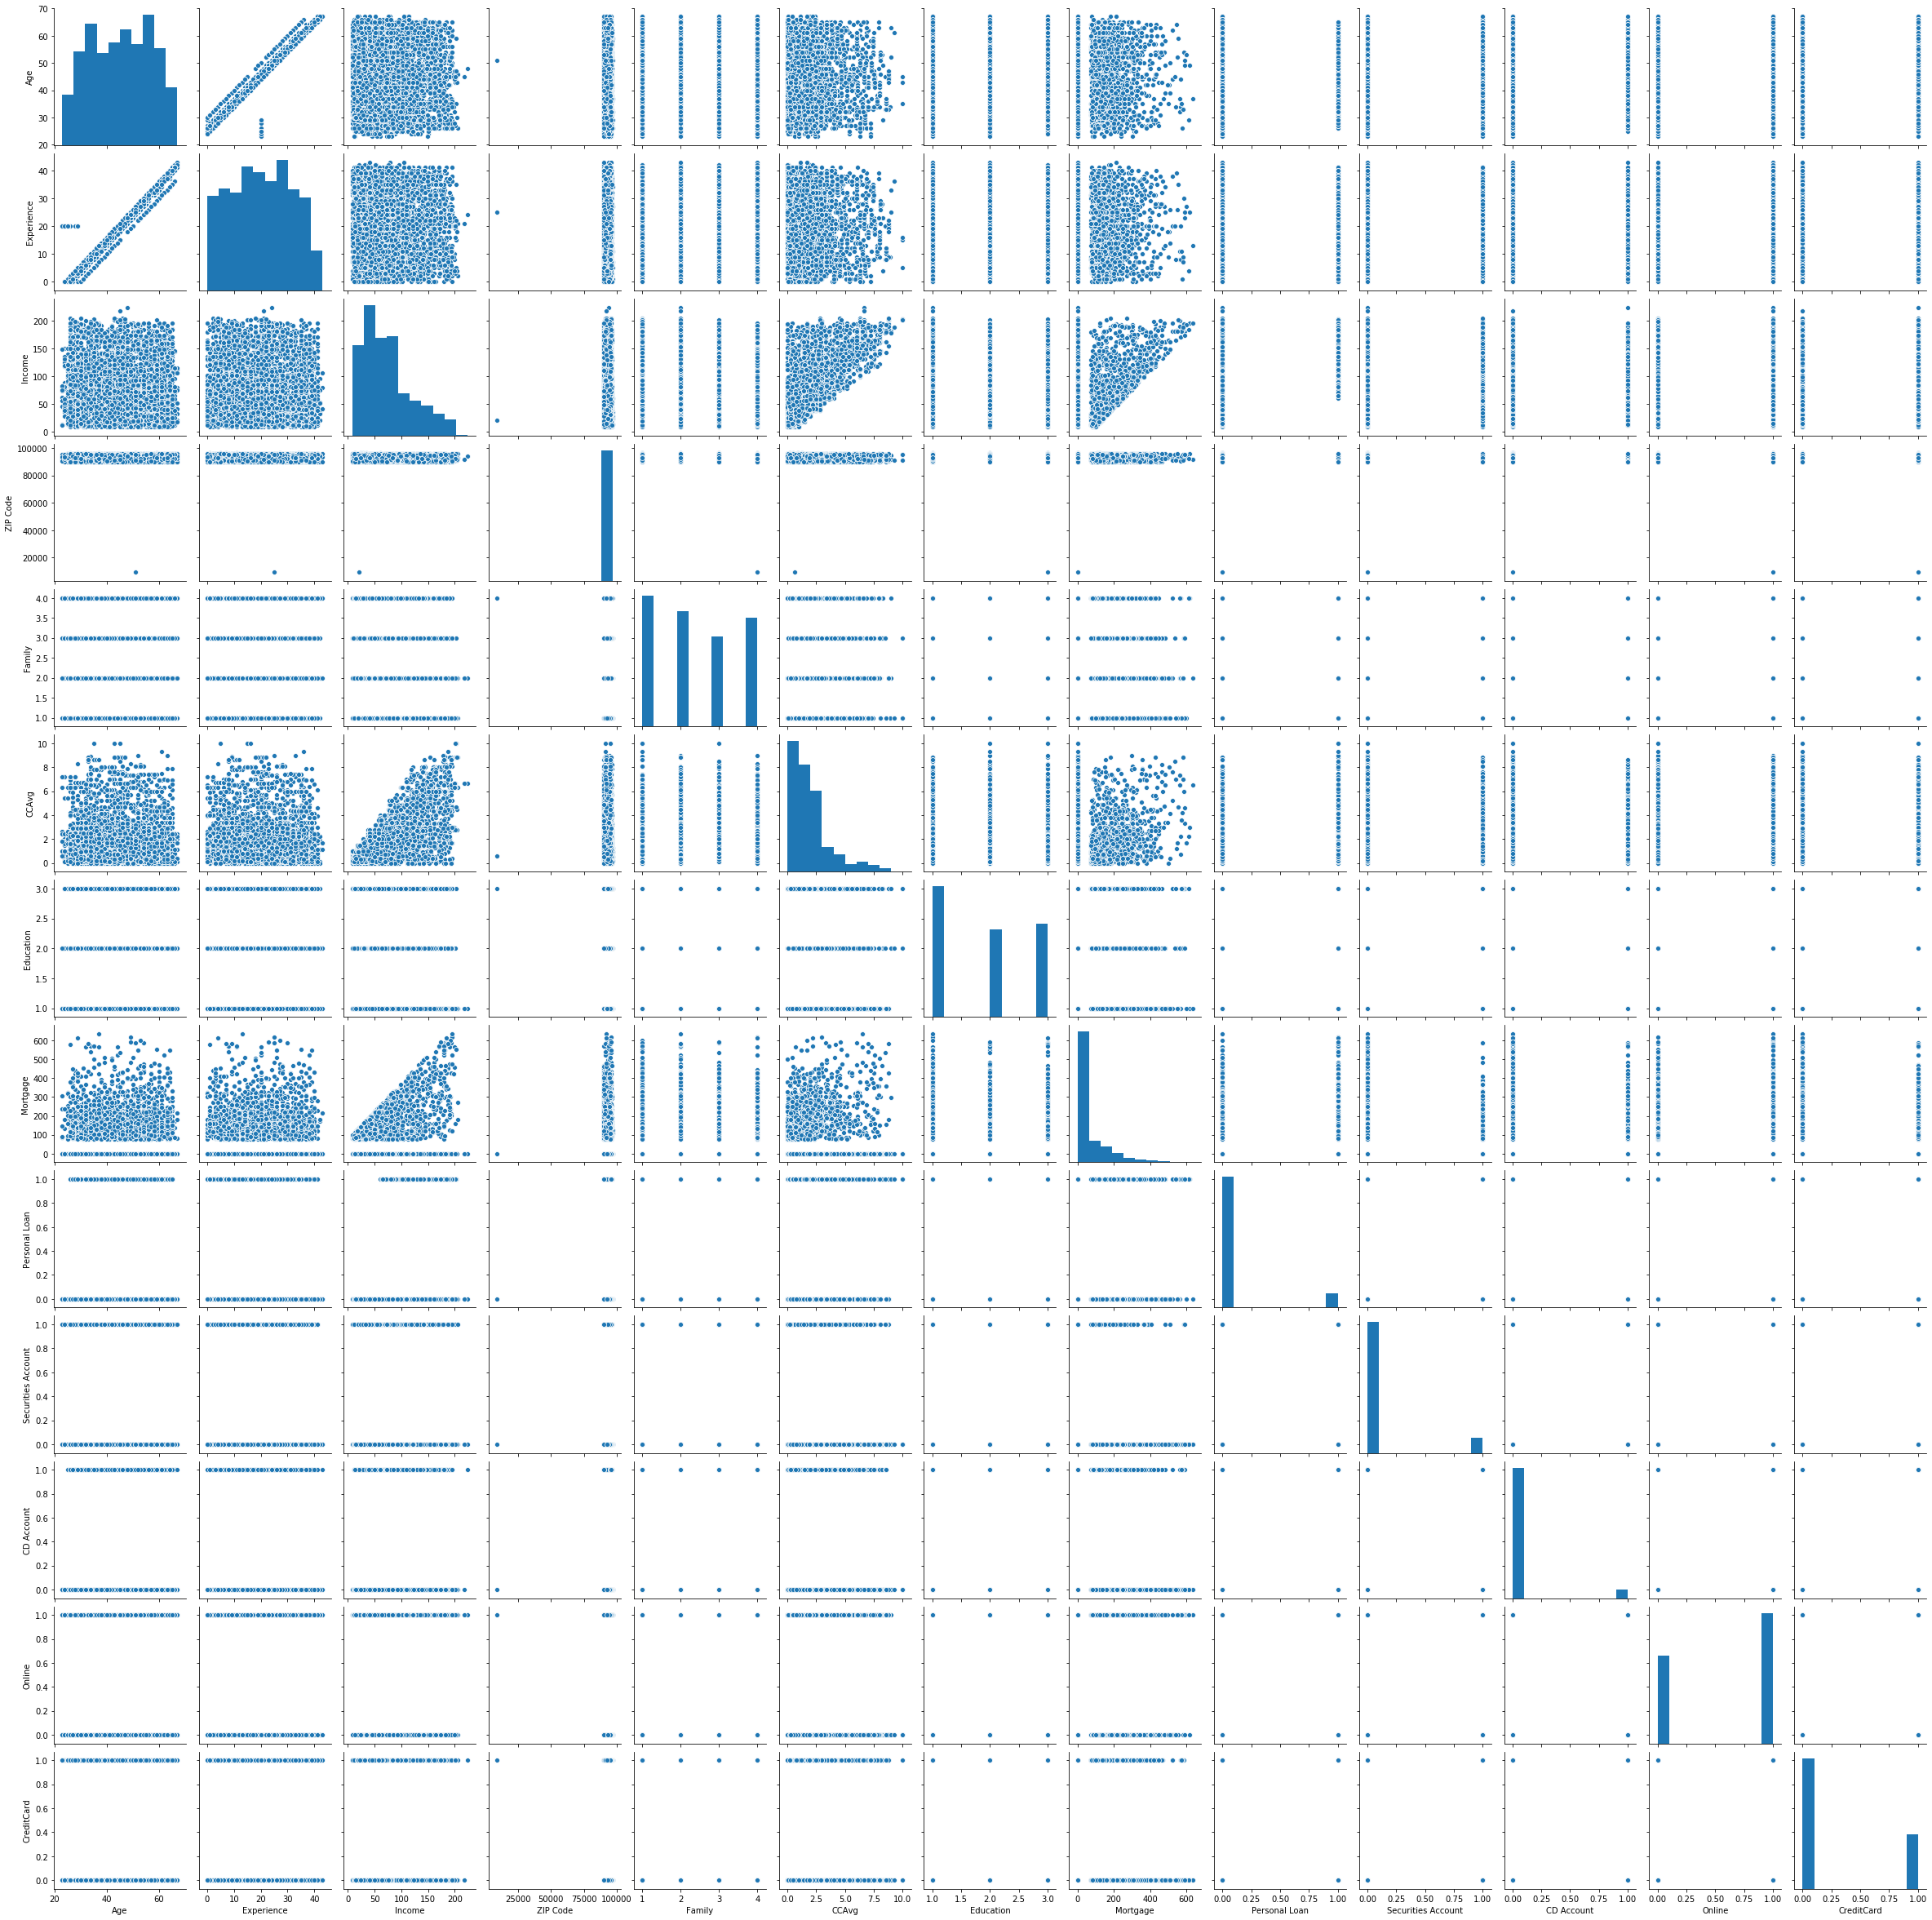

In [15]:
sns.pairplot(cr_df[['Age','Experience','Income','ZIP Code','Family','CCAvg' ,'Education' , 'Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']] )
plt.show()

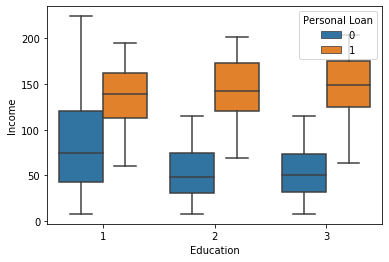

In [16]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan", data=cr_df) 

Person who took loan have higher income regardless of education level

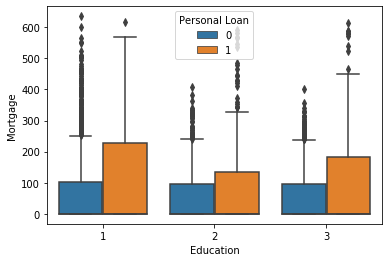

In [17]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=df)

Person who took loan has higher Mortgage

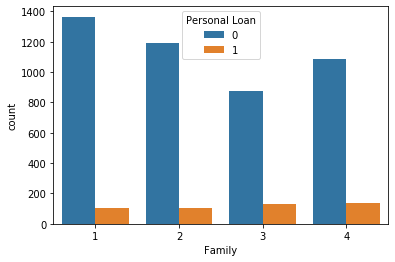

In [18]:
sns.countplot(x="Family", data=cr_df,hue="Personal Loan")

Loan person count is almost same regardless of family size

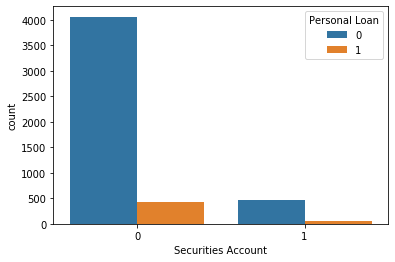

In [19]:
sns.countplot(x="Securities Account", data=df,hue="Personal Loan")

person who took loan , mostly does not have Securities Accounts

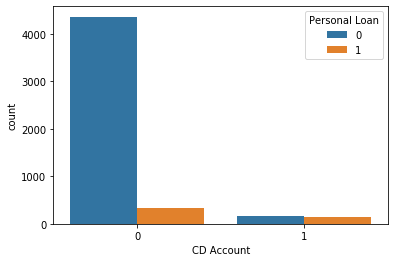

In [20]:
sns.countplot(x="CD Account", data=df,hue="Personal Loan")

person who took loan , out of those only less than 50% persons has CD Accounts

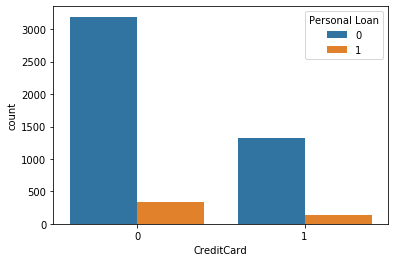

In [21]:
sns.countplot(x="CreditCard", data=df,hue="Personal Loan")

person who took loan , out of those only approx 30% persons has Credit Card

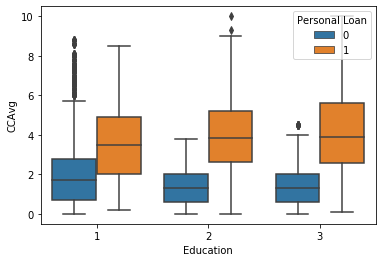

In [22]:
sns.boxplot(x="Education", y="CCAvg", hue="Personal Loan", data=cr_df) 

person who took loan has more CCAvg

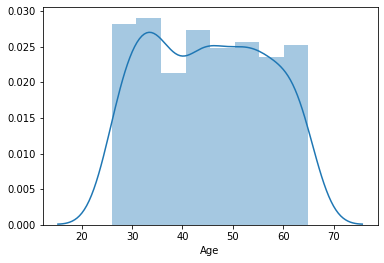

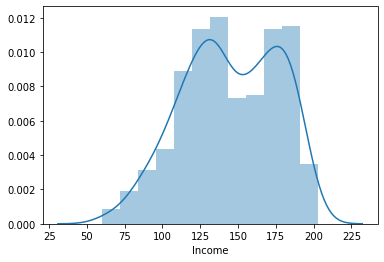

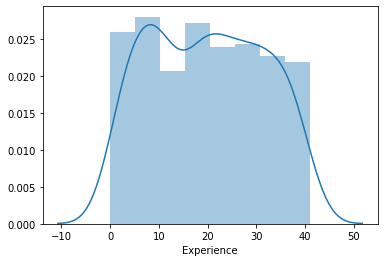

In [23]:
sns.distplot(cr_df[cr_df['Personal Loan']==1]['Age'])
plt.show()
sns.distplot(cr_df[cr_df['Personal Loan']==1]['Income'])
plt.show()
sns.distplot(cr_df[cr_df['Personal Loan']==1]['Experience'])
plt.show()

Person who took loan has:
    Age between 30 -60
    Exp between 5 - 35
    Income 120k - 180k

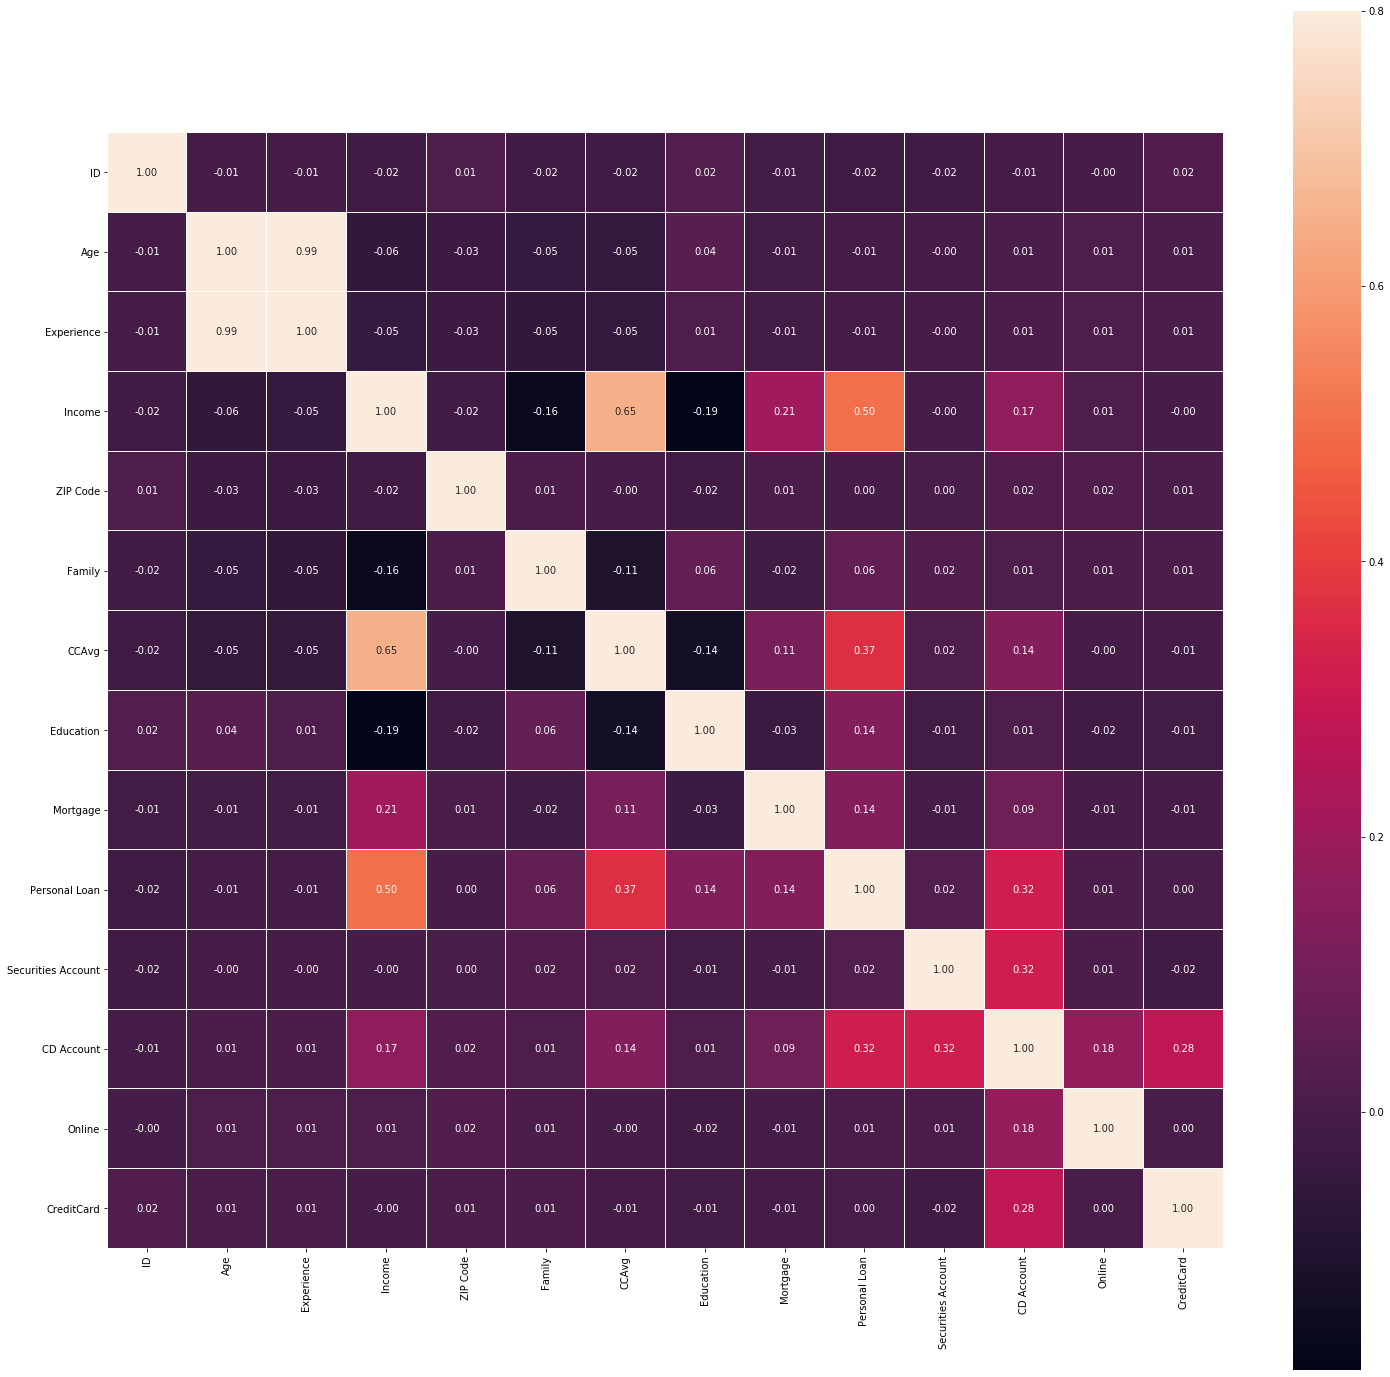

In [24]:
plt.figure(figsize=(25, 25))
ax = sns.heatmap(df.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)

Age & Exp and Income & CCAvg are corelated so we can Exp and CCAvg for modeling

In [25]:
cr_df = cr_df.drop('Experience', axis =1 ) 
cr_df = cr_df.drop('CCAvg', axis =1 ) 
cr_df.head()

,Age,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1,0,0,1,0,0,0
1,45,34,90089,3,1,0,0,1,0,0,0
2,39,11,94720,1,1,0,0,0,0,0,0
3,35,100,94112,1,2,0,0,0,0,0,0
4,35,45,91330,4,2,0,0,0,0,0,1


In [26]:
#Convert X & Y variable to a categorical variable as relevant
cr_df['Family'] = cr_df['Family'].astype('category')
cr_df['Education'] = cr_df['Education'].astype('category')
cr_df['Personal Loan'] = cr_df['Personal Loan'].astype('category')
cr_df['Securities Account'] = cr_df['Securities Account'].astype('category')
cr_df['CD Account'] = cr_df['CD Account'].astype('category')
cr_df['Online'] = cr_df['Online'].astype('category')
cr_df['CreditCard'] = cr_df['CreditCard'].astype('category')

cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Income              5000 non-null   int64   
 2   ZIP Code            5000 non-null   int64   
 3   Family              5000 non-null   category
 4   Education           5000 non-null   category
 5   Mortgage            5000 non-null   int64   
 6   Personal Loan       5000 non-null   category
 7   Securities Account  5000 non-null   category
 8   CD Account          5000 non-null   category
 9   Online              5000 non-null   category
 10  CreditCard          5000 non-null   category
dtypes: category(7), int64(4)
memory usage: 191.3 KB


In [27]:
#Calculate baseline proportion - ratio of Yes to No to identify data imbalance
#cr_df['Personal Loan'].value_counts(normalize=True)*100
prop_Y = cr_df['Personal Loan'].value_counts(normalize=True)
print(prop_Y)

0    0.904
1    0.096
Name: Personal Loan, dtype: float64


There is a huge imbalance in the data

In [28]:
## Define X and Y variables
X = cr_df.drop('Personal Loan', axis=1)
#X = cr_df.drop('Online', axis=1)
Y = cr_df[['Personal Loan']]

In [29]:
#Convert categorical vriables to dummy variables
X = pd.get_dummies(X,drop_first=True)

In [30]:
X.columns

Index(['Age', 'Income', 'ZIP Code', 'Mortgage', 'Family_2', 'Family_3',
       'Family_4', 'Education_2', 'Education_3', 'Securities Account_1',
       'CD Account_1', 'Online_1', 'CreditCard_1'],
      dtype='object')

In [31]:
X.head()

,Age,Income,ZIP Code,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1
0,25,49,91107,0,0,0,1,0,0,1,0,0,0
1,45,34,90089,0,0,1,0,0,0,1,0,0,0
2,39,11,94720,0,0,0,0,0,0,0,0,0,0
3,35,100,94112,0,0,0,0,1,0,0,0,0,0
4,35,45,91330,0,0,0,1,1,0,0,0,0,1


In [32]:
##Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

In [33]:
#Build the logistic regression model
import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.110191
         Iterations 9


In [34]:
#Summary of logistic regression
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3486
Method:                           MLE   Df Model:                           13
Date:                Thu, 09 Jul 2020   Pseudo R-squ.:                  0.6479
Time:                        16:24:30   Log-Likelihood:                -385.67
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                9.263e-296
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -14.1695      5.125     -2.765      0.006     -24.215      -4.124
Age                      0.0014      0.008      0.168      0.867      -0.015       0.018
Income      

In [35]:
#Calculate Odds Ratio, probability
##create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [36]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Education_3,4.08,59.34,0.98,0.00
Education_2,3.82,45.62,0.98,0.00
CD Account_1,3.76,43.15,0.98,0.00
Family_3,2.46,11.72,0.92,0.00
Family_4,1.66,5.24,0.84,0.00
Income,0.07,1.07,0.52,0.00
Online_1,-0.53,0.59,0.37,0.01
CreditCard_1,-0.99,0.37,0.27,0.00
Securities Account_1,-1.01,0.36,0.27,0.01
const,-14.17,0.00,0.00,0.01


person who has CD Account and qualification is graduate or more, has more than 90% probability to take loan

In [38]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train) # make a model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_predict = logreg.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

In [41]:
def GetPerformance(X_train,y_train,X_test,y_test,y_predict,model):
    print("Trainig accuracy",model.score(X_train,y_train))  
    print()
    print("Testing accuracy",model.score(X_test, y_test))
    print()
    print('Confusion Matrix')
    print(draw_cm(y_test,y_predict))
    print()
    print("Recall:",recall_score(y_test,y_predict))
    print()
    print("Precision:",precision_score(y_test,y_predict))
    print()
    print("F1 Score:",f1_score(y_test,y_predict))
    print()
    print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

Trainig accuracy 0.9077142857142857

Testing accuracy 0.908

Confusion Matrix


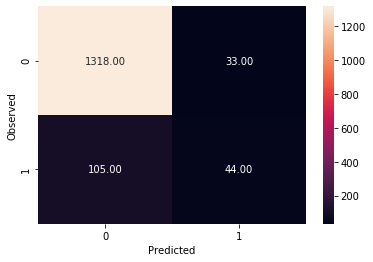

None

Recall: 0.2953020134228188

Precision: 0.5714285714285714

F1 Score: 0.3893805309734513

Roc Auc Score: 0.6354378312857988


In [42]:
GetPerformance(X_train,y_train,X_test,y_test,y_predict,logreg)

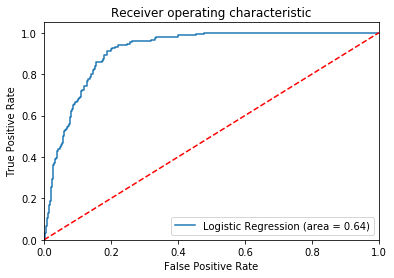

In [43]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [44]:
# Checking Parameters of logistic regression
logreg.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [45]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 1,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.959, 0.908, 0.908, 0.905, 0.905]

[0.957, 0.908, 0.909, 0.901, 0.901]


In [46]:
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 1,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.961, 0.905]

[0.958, 0.901]


In [47]:
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced') # changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.9077142857142857

Testing accuracy 0.918


In [48]:
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear',class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.853, 0.908, 0.91, 0.91, 0.908, 0.908]

[0.84, 0.913, 0.917, 0.919, 0.919, 0.918]


Trainig accuracy 0.908

Testing accuracy 0.9186666666666666

Confusion Matrix


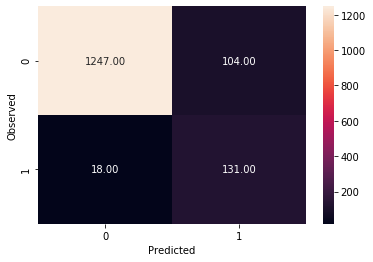

None

Recall: 0.8791946308724832

Precision: 0.5574468085106383

F1 Score: 0.6822916666666666

Roc Auc Score: 0.9011073080343172


In [49]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', class_weight='balanced',C=0.75) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [52]:
# Classification Report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1351
           1       0.56      0.88      0.68       149

    accuracy                           0.92      1500
   macro avg       0.77      0.90      0.82      1500
weighted avg       0.94      0.92      0.93      1500



it seems like 'Logistic Regression' algorithm have the highest accuracy and we can choose that as our final model

High recall, low precision: This means that most of the positive case (liability customer buying personal loans) are correctly recognized but there are a lot of false positives which is fine because objective is to increase concersion rate.